### PART 3 - TIME SERIES DATA

This part uses the threecenturies_v2.3 datasets. Import Real GDP at market prices, unemployment
rate and consumer price inflation for the period 1900-2000 in Python from the A1 worksheet.

In [38]:
%pip install openpyxl
%pip install statsmodels
%pip install arch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import f
from scipy.stats.mstats import trim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_excel('./textfiles/threecenturies_v2.3.xlsx', sheet_name='A1. Headline series')

In [3]:
#Real GDP at market prices for the period 1900-2000
real_GDP = df.loc[246:346, 'A1. Headline Annual Series'].reset_index(drop=True)
real_GDP = real_GDP.rename('Real GDP at market prices')

#Unemployment rate for the period 1900-2000
unemp_rate = df.loc[246:346, 'Unnamed: 15'].reset_index(drop=True)
unemp_rate = unemp_rate.rename('Unemployment rate')

#Consumer price inflation for the period 1900-2000
cons_price_infl = df.loc[246:346, 'Unnamed: 28'].reset_index(drop=True)
cons_price_infl = cons_price_infl.rename('Consumer price inflation')

In [4]:
unemp_rate

0      3.679865
1      4.877351
2      5.145694
3      5.603507
4      6.914821
         ...   
96     8.097052
97     6.972014
98     6.255467
99     5.976813
100    5.459049
Name: Unemployment rate, Length: 101, dtype: object

### 27. Define strict and weak stationarity.

A time series is said to be strictly stationary if the joint distribution of any set of observations is invariant under time shifts. In simpler terms, the entire probability distribution of the series remains constant over time. This implies that the mean, variance, and all higher-order moments of the distribution do not change with time. 

A time series is considered weakly stationary if the mean, variance, and autocorrelation structure remain constant over time. So, unlike strict stationarity, weak stationarity allows for shifts in the higher-order moments of the distribution, as long as the first and second moments (mean and variance) are constant.

### 28. Explain ergodicity and state the ergodic theorem. Illustrate with an example. 

In an ergodic system, the statistical properties derived from a single, sufficiently long time series realization are representative of the ensemble average over all possible realizations of the process. In simpler terms, the system explores all its possible states over time, and the long-term behavior of a single trajectory provides meaningful information about the entire system.

The Birkhoff Ergodic Theorem states that, for an ergodic process, the time average of a function along a single trajectory converges to the ensemble average as the length of the observation time increases.
Mathematically, if $X_t$ represents a time series and $f$ is a measurable function, the Birkhoff Ergodic Theorem can be expressed as follows:

$$ lim_{T→∞}\frac{1}{X_T} \int_{0}^{T} f(X_t) \, dt=E[f(X_t)] $$
where $E$ denotes the ensemble average.

Now let's see a simple example. Consider a simple random walk process where the value at each time step is determined by flipping a fair coin. Let $X_t$ be the position of the walker at time $t$, where the walker moves +1 with probability 0.5 and -1 with probability 0.5.

Then $X_t$ could be the position of the walker, i.e., we take $f$ in the previous theorem as the identity function. The ergodic theorem implies that the time average of the position over a long time should converge to the expected position over all possible trajectories. Notice that, as our time serie is discrete, the integral becomes a sum:
$$ lim_{T→∞}\frac{1}{X_T} \sum_{0}^{T} X_t = E(X_t) $$

In this example, the long-term average position of the walker along a single trajectory should converge to zero, as the expected position over all possible trajectories is zero (since the coin is fair, and the expected value of each step is $0.5×1+0.5×(−1)=0$.

### 29. Why do we need both stationarity and ergodicity? 

Firstly, having both stationarity and ergodicity often leads to more consistent and reliable parameter estimation. Indeed, when a process is both stationary and ergodic, statistical estimates derived from a single realization of the process are likely to be representative of the true underlying parameters.

Secondly, the combination of stationarity and ergodicity enhances the long-term predictability of the time series. Predictive models built on a stationary and ergodic process can be more reliable when extrapolating trends and making forecasts into the future.

### 30. Explain “spurious regression”. 

"Spurious regression" describes a situation where two or more variables appear to be correlated or have a significant relationship when, in fact, they are not causally related. In other words, the observed correlation is misleading and occurs due to a shared trend or common source of variation rather than a genuine cause-and-effect relationship. For example, for time series time can be one common factor.

### 31. Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average.

A moving average is a calculus used to analyze data points by creating a series of averages of different subsets of the full data set. It is particularly useful for smoothing out short-term fluctuations and highlighting longer-term trends or cycles. The moving average is calculated by taking the average of a set of data points within a defined window or interval, which is then moved through the data set.

The choice of the size of the moving average window involves a trade-off between sensitivity and smoothness.
In fact, a smaller window size reacts more quickly to changes in the data, making it more sensitive to short-term fluctuations. However, it might introduce more noise and may not capture longer-term trends effectively. On the other hand, a larger window size provides a smoother average by reducing sensitivity to short-term fluctuations but may lag in responding to significant changes.

Concerning the choice of whether to center the moving average, it involves a trade-off between time delay and symmetry. Indeed, centering the moving average means placing the average value at the center of the window. This introduces a time delay because the center is aligned with the middle of the data points. The advantage is that it provides a more symmetric representation of the data. If the moving average is not centered, it responds more quickly to changes, but it may not accurately represent the central tendency of the data.

### 32. Make all time series stationary by computing the difference between the original variable and a moving average of order 5.

In [5]:
print(real_GDP)

0      181160.264436
1      184974.529384
2      187756.550527
3       186015.76815
4      188155.559259
           ...      
96           1243709
97           1282602
98           1323527
99           1366983
100          1418176
Name: Real GDP at market prices, Length: 101, dtype: object


In [6]:
# Compute the moving average of order 5 for real_GDP
moving_avg_real_gdp = real_GDP.rolling(window=5).mean()

real_gdp_stationary = (real_GDP - moving_avg_real_gdp).dropna()

# idem for unemp_rate and cons_price_infl
moving_avg_unemp_rate = unemp_rate.rolling(window=5).mean()
unemp_rate_stationary = (unemp_rate - moving_avg_unemp_rate).dropna()

moving_avg_cons_price_infl = cons_price_infl.rolling(window=5).mean()
price_inf_stationary = (cons_price_infl - moving_avg_cons_price_infl).dropna()

res32 = [real_gdp_stationary, unemp_rate_stationary, price_inf_stationary]

In [7]:
real_gdp_stationary

4      2543.024907
5      5552.106133
6      7700.600228
7      8567.846532
8      -707.442646
          ...     
96         65790.8
97         70372.0
98         74371.0
99         81059.2
100        91176.6
Name: Real GDP at market prices, Length: 97, dtype: object

 ### 33. Compute the difference between the resulting time series of question 32 and a moving average of order 10. Give the exact formula for the weights after the two transformations.

The exact formula is: $${Ps_t} = {P_t} - {MA}_{1,5} = P_t - (\frac 1 5 \sum_{i= 0}^{4} P_{t-i}) $$

$$ {Ps_t} - {MA}_{10} = P_t - 2(\frac 1 {10} \sum_{i= 0}^{4} P_{t-i}) -  \frac 1 {10} \sum_{i= 0}^{4} P_{s_{t-i}}$$

$$ {Ps_t} - {MA}_{10} = P_t - 2(\frac 1 {10} \sum_{i= 0}^{4} P_{t-i}) -  \frac 1 {10}( \sum_{j= 0}^{9} P_{t-i} - (\frac 1 {5} \sum_{i= 0}^{4} P_{s_{t--j-i}}))$$

Which finally gives after an index change: 

$$ {Ps_t} - {MA}_{10} = P_t - \frac 1 {50} \sum_{i= t-9}^{t} \sum_{j= t-4}^{t} {P}_{i-j + 1} $$

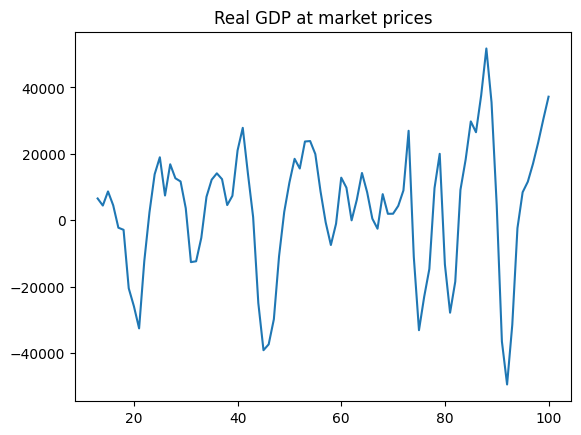

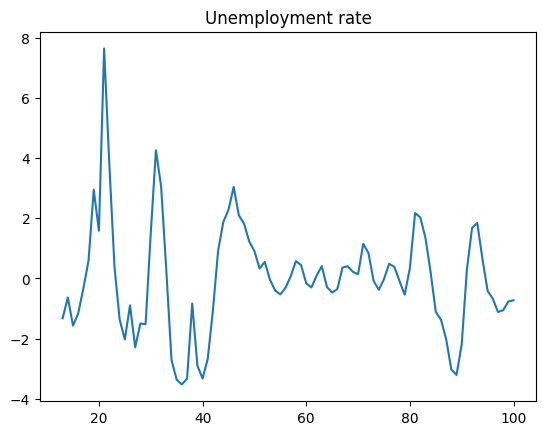

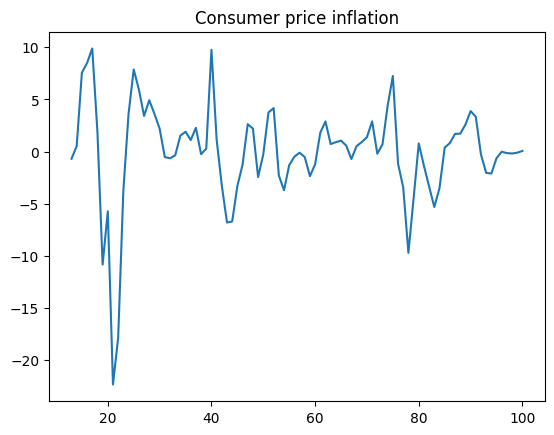

In [8]:
res33 = {}
for val in res32 :
    moving_avg = val.rolling(window=10).mean()
    res33[val.name + ' MVA5 then MVA10'] = (val-moving_avg).dropna()
    plt.figure()
    plt.title(val.name)
    plt.plot((val-moving_avg).dropna())

moving_avg_real_gdp = res33['Real GDP at market prices MVA5 then MVA10']

### 34. Using the original dataset, test the unit root hypothesis for all variables. 

In [9]:
from statsmodels.tsa.stattools import adfuller

real_GDP_ADF = adfuller(real_GDP.dropna())
unemp_rate_ADF = adfuller(unemp_rate.dropna())
cons_price_infl_ADF = adfuller(cons_price_infl.dropna())

print('ADF Statistic Real GDP: %f' % real_GDP_ADF[0])
print('p-value: %f' % real_GDP_ADF[1])
print('Critical Values:')
for key, value in real_GDP_ADF[4].items():
    print('\t%s: %.3f' % (key, value))      # 1% < 5% < 10% => non stationnaire

print('ADF Statistic Unemployment Rate: %f' % unemp_rate_ADF[0])  # 1% < 5% < 10% => non stationnaire 
print('p-value: %f' % unemp_rate_ADF[1])
print('Critical Values:')
for key, value in unemp_rate_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

print('ADF Statistic Consummer Price Inflation: %f' % cons_price_infl_ADF[0])  # 1% < 5% < 10% => non stationnaire
print('p-value: %f' % cons_price_infl_ADF[1])
print('Critical Values:')
for key, value in cons_price_infl_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic Real GDP: 4.334307
p-value: 1.000000
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
ADF Statistic Unemployment Rate: -2.363203
p-value: 0.152393
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
ADF Statistic Consummer Price Inflation: -4.050359
p-value: 0.001169
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In the case of $\textit{Consumer Price Inflation}$, we observe that the $\textit{ADF Statistic}$ (-4.050359) is lower than all critical values, and the $\textit{p-value}$ (0.001169) is less than a common significance level like 0.05. Therefore, we can reject the null hypothesis. This suggests that the time series of $\textit{Consumer Price Inflation}$ is stationary. On the contrary, for $\textit{Real GDP}$ and the Unemployment Rate, the $\textit{ADF Statistic}$ is higher than the critical values at 1%, 5%, and 10%. Moreover, the $\textit{p-value}$ is greater than 0.05. Therefore, we cannot reject the null hypothesis of a unit root. In both cases, it may be necessary to explore other methods or transformations to make the time series stationary before modeling them.

### 35. Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34. 


In [10]:
real_GDP_stat_ADF = adfuller(real_gdp_stationary.dropna())
unemp_rate_stat_ADF = adfuller(unemp_rate_stationary.dropna())
cons_price_infl_stat_ADF = adfuller(price_inf_stationary.dropna())

print('ADF Statistic Real GDP: %f' % real_GDP_stat_ADF[0])
print('p-value: %f' % real_GDP_stat_ADF[1])
print('Critical Values:')
for key, value in real_GDP_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))      # 1% < 5% < 10% => non stationnaire

print('ADF Statistic Unemployment Rate: %f' % unemp_rate_stat_ADF[0])  # 1% < 5% < 10% => non stationnaire 
print('p-value: %f' % unemp_rate_stat_ADF[1])
print('Critical Values:')
for key, value in unemp_rate_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

print('ADF Statistic Consummer Price Inflation: %f' % cons_price_infl_stat_ADF[0])  # 1% < 5% < 10% => non stationnaire
print('p-value: %f' % cons_price_infl_stat_ADF[1])
print('Critical Values:')
for key, value in cons_price_infl_stat_ADF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic Real GDP: -0.371381
p-value: 0.914769
Critical Values:
	1%: -3.507
	5%: -2.895
	10%: -2.585
ADF Statistic Unemployment Rate: -4.911161
p-value: 0.000033
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
ADF Statistic Consummer Price Inflation: -4.989333
p-value: 0.000023
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### 36. Explain the difference between ACF and PACF.

The Auto-Correlation Function (ACF) is a statistical tool used in time series analysis to quantify the correlation between a time series and its own lagged values.
The Partial Auto-Correlation Function (PACF) is another tool used in time series analysis, and it is closely related to the ACF. The key difference is that PACF measures the correlation between a particular lag and the observed series while controlling for the effects of other lags in between. In essence, PACF isolates the direct relationship between an observation and its lag without the influence of the intermediate lags.

So in the end, ACF is used to show the overall correlation structure of the time series, including both direct and indirect influences of past observations and  for identifying the order of autoregressive (AR) terms in time series models. Where PACF is used to isolate the direct relationship between an observation and its lag, providing insights into the specific influence of each lag and for identifying the order of moving average (MA) terms in time series models.

### 37. Plot and comment on the ACF and PACF of all variables. 


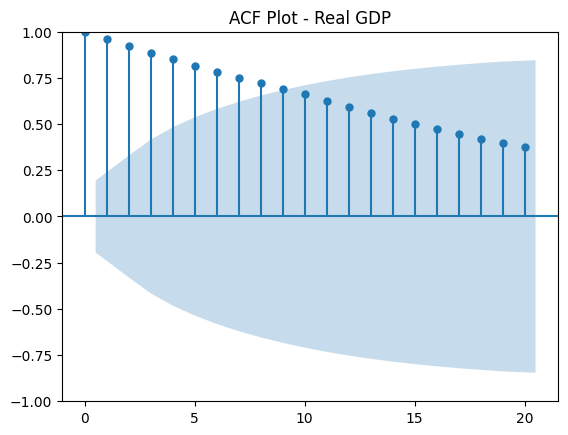

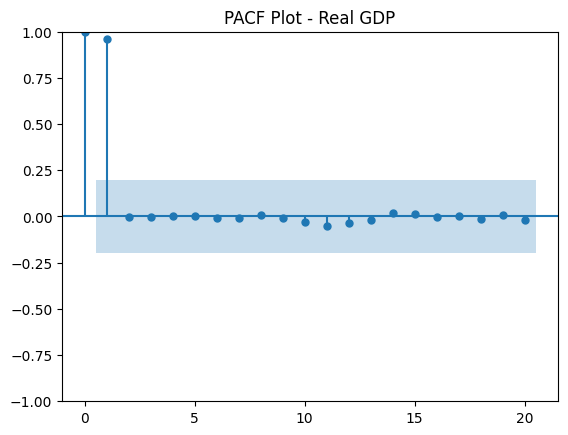

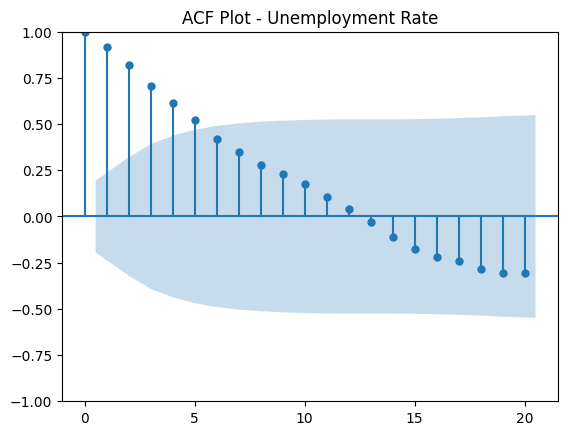

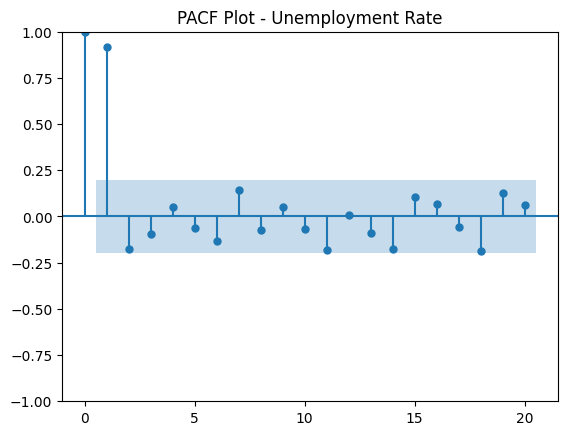

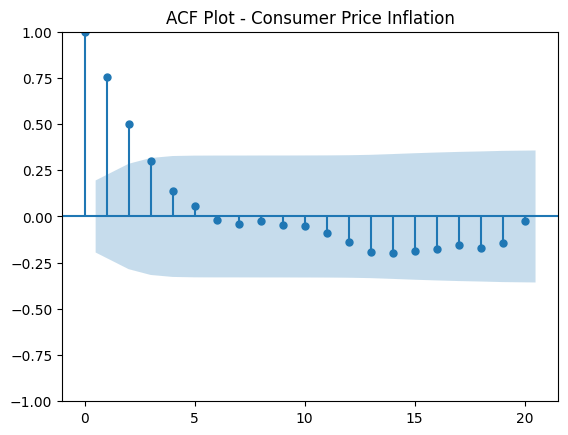

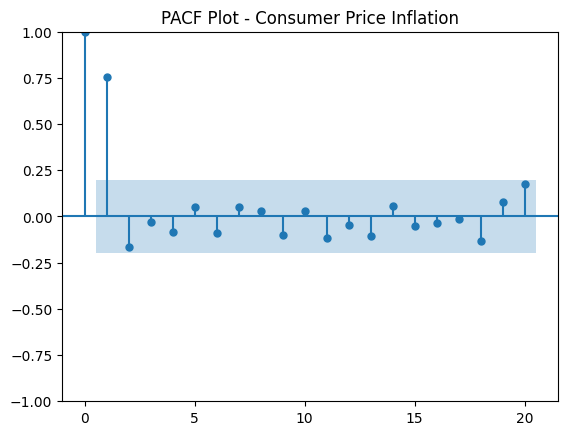

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Compute ACF and PACF for real_GDP
plot_acf(real_GDP, lags=20)
plt.title('ACF Plot - Real GDP')
plt.show()
plot_pacf(real_GDP, lags=20)
plt.title('PACF Plot - Real GDP')
plt.show()

# Compute ACF and PACF for unemp_rate
plot_acf(unemp_rate, lags=20)
plt.title('ACF Plot - Unemployment Rate')
plt.show()
plot_pacf(unemp_rate, lags=20)
plt.title('PACF Plot - Unemployment Rate')
plt.show()

# Compute ACF and PACF for cons_price_infl
plot_acf(cons_price_infl, lags=20)
plt.title('ACF Plot - Consumer Price Inflation')
plt.show()
plot_pacf(cons_price_infl, lags=20)
plt.title('PACF Plot - Consumer Price Inflation')
plt.show()

### 38. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion. 

The principle of parsimony, also known as Occam's razor suggests that, all else being equal, simpler explanations or models should be preferred over more complex ones. In other words, if there are multiple competing hypotheses or models that explain the observed data equally well, the one that requires the fewest assumptions or entities is often considered more likely to be correct.

Information criterion, such as Bayesian or Akaike, embody the principle of parsimony by penalizing models with more parameters. This penalty discourages overfitting, where a model might fit the training data too closely, capturing noise rather than genuine patterns. In fact, a lower AIC or BIC value indicates a better balance between model fit and simplicity. So, a model with a lower AIC is considered more parsimonious.

### 39. Explain the problem of auto-correlation of the errors. 

Autocorrelation of the errors means that the residuals (the differences between observed and predicted values) in a regression model are correlated with each other over time. The problem is that the presence of this autocorrelation violates one of the assumptions of classical linear regression, namely, the assumption of independence of errors. In a well-behaved regression model, residuals should be independent of each other. 

Autocorrelation has a lot of consequences that can penalize the statistical analysis: it can lead to inefficient parameter estimates, affect hypothesis tests for the significance of coefficients and also impact the reliability of forecasting.

### 40. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors. 


In [12]:
# Add a constant column to the independent variables
X = sm.add_constant(pd.concat([unemp_rate_stationary, price_inf_stationary], axis=1))

# Convert X and real_gdp_stationary to numpy arrays
X_arr = np.asarray(X, dtype=np.float64)
real_gdp_stationary_arr = np.asarray(real_gdp_stationary, dtype=np.float64)

# Fit the regression model
model = sm.OLS(real_gdp_stationary_arr, X_arr)
results = model.fit()

p_value = sm.stats.stattools.durbin_watson(results.resid)

print(results.summary())
print("p-value:", p_value)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     12.29
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.81e-05
Time:                        10:32:23   Log-Likelihood:                -1112.6
No. Observations:                  97   AIC:                             2231.
Df Residuals:                      94   BIC:                             2239.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.455e+04   2392.277     10.264      0.0

We can see that $p_\text{value}$ (that's equal to $2(1-\text{r}))$ where $r$ is the sample autocorrelation of the residuals) is equal to 0.196. It means that $r$ is close to $0$ indicating a positive serial correlation.

### 41. Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on the difference with question 40. 


We consider the following model (In the following equations, y, x and z denote GDF, Unemployment and Inflation respectively): $$ y_{t-1} = \beta_0 + \beta_1x_{t-1} + \beta_2z_{t-1} + u_{t-1}$$ $$ y_{t} = \beta_0 + \beta_1x_{t} + \beta_2z_{t} + u_{t}$$ $$ u_t = \rho u_{t-1} + e_t $$ Subtracting the first equation from the second gives : $$y_{t} - \rho y_{t-1} = (1-\rho)\beta_0 + \beta_1(x_t - \rho x_{t-1}) + \beta_2(z_t - \rho z_{t-1}) e_t $$

So, we need to first perform an OLS regression to determine $\rho$ :

In [13]:
# OSL regression of the residuals : 
u = results.resid
n = len(u)
u_1 = u[0:n-1]
const = np.ones(n-1)

X_corr = np.column_stack((const, u_1))
y_corr = u[1:n]

model_corr = sm.OLS(y_corr, X_corr)
results_res = model_corr.fit()

# Computing rho parameter :
rho = results_res.params[1]
print(f'rho : {rho}')

rho : 0.9287601224400945


In [14]:
real_gdp_lag1 = real_gdp_stationary.shift(1).dropna() 
unemp_rate_lag1 = unemp_rate_stationary.shift(1).dropna()
price_inf_lag1 = price_inf_stationary.shift(1).dropna()
real_gdp_lag1.iloc[0], unemp_rate_lag1.iloc[0], price_inf_lag1.iloc[0] = real_gdp_stationary.iloc[0], unemp_rate_stationary.iloc[0], price_inf_stationary.iloc[0]

real_gdp_gls = real_gdp_stationary.dropna() - rho*real_gdp_lag1
unemp_rate_gls = unemp_rate_stationary.dropna() - rho*unemp_rate_lag1
price_inf_gls = price_inf_stationary.dropna() - rho*price_inf_lag1
X_gls = sm.add_constant(pd.concat([unemp_rate_gls, price_inf_gls], axis=1))

# Convert X and real_gdp_stationary to numpy arrays
X_gls_arr = np.asarray(X_gls, dtype=np.float64)
real_gdp_gls_arr = np.asarray(real_gdp_gls, dtype=np.float64)

# Fit the regression model
# Remove rows with inf or nans from X and real_gdp_stationary
valid_rows = np.isfinite(X_gls_arr).all(axis=1) & np.isfinite(real_gdp_gls_arr)
X_gls_vf = X_gls_arr[valid_rows]
real_gdp_gls_vf = real_gdp_gls_arr[valid_rows]

model_gls = sm.OLS(real_gdp_gls_vf, X_gls_vf)
results_gls = model_gls.fit()

p_value_gls = sm.stats.stattools.durbin_watson(results_gls.resid)


print(results_gls.summary())
print("p-value:", p_value_gls)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     28.35
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.44e-10
Time:                        10:32:23   Log-Likelihood:                -1021.6
No. Observations:                  96   AIC:                             2049.
Df Residuals:                      93   BIC:                             2057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2431.1379   1049.915      2.316      0.0

c:\Users\Ulysse\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\Ulysse\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


We can see that as $p_\text{value}$ is further from $0$ and closer to $2$, so $r$ is also further from 0. Then it means that we have slightly corrected the autocorrelation errors.

### 42. For all variables, construct their lag 1 and lag 2 variables. 

In [15]:
# Construct lag 1 and lag 2 variables for real_gdp_stationary
real_gdp_lag1 = real_gdp_stationary.shift(1)
real_gdp_lag2 = real_gdp_stationary.shift(2)

# Construct lag 1 and lag 2 variables for unemp_rate_stationary
unemp_rate_lag1 = unemp_rate_stationary.shift(1)
unemp_rate_lag2 = unemp_rate_stationary.shift(2)

# Construct lag 1 and lag 2 variables for price_inf_stationary
price_inf_lag1 = price_inf_stationary.shift(1)
price_inf_lag2 = price_inf_stationary.shift(2)

### 43. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why? 


In [16]:
X_lag = sm.add_constant(pd.concat([unemp_rate_lag1, unemp_rate_lag2, price_inf_lag1, price_inf_lag2], axis=1))
X_lag_arr = np.asarray(X_lag, dtype=np.float64)
real_gdp_lag_arr = np.asarray(real_gdp_stationary, dtype=np.float64)

# Fit the regression model
# Remove rows with inf or nans from X and real_gdp_stationary
valid_rows = np.isfinite(X_lag_arr).all(axis=1) & np.isfinite(real_gdp_lag_arr)
X_lag_vf = X_lag_arr[valid_rows]
real_gdp_lag_vf = real_gdp_lag_arr[valid_rows]

model_lag = sm.OLS(real_gdp_lag_vf, X_lag_vf)
results_lag = model_lag.fit()

p_value_lag = sm.stats.stattools.durbin_watson(results_lag.resid)


print(results_lag.summary())
print("p-value:", p_value_lag)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     3.306
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0142
Time:                        10:32:23   Log-Likelihood:                -1094.6
No. Observations:                  95   AIC:                             2199.
Df Residuals:                      90   BIC:                             2212.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.475e+04   2575.639      9.608      0.0

The number of observations is 95 because

### 44. State and test the no-Granger causality hypothesis of inflation on GDP at the 10% level

If we want to know if the passed values of inflation can predict the values of the GDP, we can perform a Granger Test whith the following hypothesis: $$H_0 : \text{The passed values of Inflation have no impact on the value of the GDP.}$$

In [46]:
df_merged = pd.merge(real_gdp_stationary, price_inf_stationary, left_index=True, right_index=True, how='inner')


# Perform the Granger causality test
max_lag = 3  # Set the maximum lag for the test
test_result = grangercausalitytests(df_merged, max_lag, verbose=True)

# Extract p-values from the test results
p_values = [test_result[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

# Set the significance level
alpha = 0.10

# Check if any p-value is less than the significance level
if any(p < alpha for p in p_values):
    print(f"At the {alpha*100}% significance level, there is Granger causality from Inflation to GDP.")
else:
    print(f"At the {alpha*100}% significance level, there is no Granger causality from Inflation to GDP.")



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0425  , p=0.0844  , df_denom=93, df_num=1
ssr based chi2 test:   chi2=3.1406  , p=0.0764  , df=1
likelihood ratio test: chi2=3.0903  , p=0.0788  , df=1
parameter F test:         F=3.0425  , p=0.0844  , df_denom=93, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7724  , p=0.4650  , df_denom=90, df_num=2
ssr based chi2 test:   chi2=1.6306  , p=0.4425  , df=2
likelihood ratio test: chi2=1.6167  , p=0.4456  , df=2
parameter F test:         F=0.7724  , p=0.4650  , df_denom=90, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4233  , p=0.2415  , df_denom=87, df_num=3
ssr based chi2 test:   chi2=4.6134  , p=0.2024  , df=3
likelihood ratio test: chi2=4.5038  , p=0.2120  , df=3
parameter F test:         F=1.4233  , p=0.2415  , df_denom=87, df_num=3
At the 10.0% significance level, there is Granger causality from Inflation to GDP.


c:\Users\Ulysse\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### 45. Divide the sample in two groups: 1900-1950 and 1951-2000. Test the stability of coefficients between the two periods.

In [24]:
# Extract coefficients for the entire period
coefficients_full_period = results.params

# Extract data for the first and second halves
real_gdp_first_half = real_GDP[:50]
unemp_rate_first_half = unemp_rate[:50]
price_inf_first_half = cons_price_infl[:50]

real_gdp_second_half = real_GDP[50:]
unemp_rate_second_half = unemp_rate[50:]
price_inf_second_half = cons_price_infl[50:]

# Add a constant term to the explanatory variables
X_first_half = sm.add_constant(pd.concat([unemp_rate_first_half, price_inf_first_half], axis=1))
X_second_half = sm.add_constant(pd.concat([unemp_rate_second_half, price_inf_second_half], axis=1))

# Perform regression for the first half
model_first_half = sm.OLS(real_gdp_first_half.astype(float), X_first_half.astype(float))
results_first_half = model_first_half.fit()
coefficients_first_half = results_first_half.params

# Perform regression for the second half
model_second_half = sm.OLS(real_gdp_second_half.astype(float), X_second_half.astype(float))
results_second_half = model_second_half.fit()
coefficients_second_half = results_second_half.params

# Compare coefficients between the two periods
coefficients_comparison = pd.DataFrame({
    'Full Period': coefficients_full_period,
    'First Half': coefficients_first_half,
    'Second Half': coefficients_second_half
})

# Display the comparison
print(coefficients_comparison)

                           Full Period     First Half    Second Half
const                     24554.356724  280934.148365  514719.299089
Unemployment rate         -7508.086201   -5723.284365   63888.865335
Consumer price inflation   -991.167712     186.277533   -8798.733129


Although the parameters obtained appear to be explicitly distinct, we will use Chow's test (structure change test) to test the following hypothesis: $$H_0 : \text{The coefficients of the two linear regressions on the different data sets S1 and S2 are equal.}$$
The Chow test formula is as follows: $$ F_{\text{Chow}} = \frac{(\text{SSR}_{init} - (\text{SSR}_{S1}+\text{SSR}_{S2}))/k}{(\text{SSR}_{S1}+\text{SSR}_{S2})/(N_1 + N_2 - 2k)}$$
$\text{SSR}_{init} :$ the residual sum of squares for the linear regression without breaks.
$\text{SSR}_{Si} :$ the residual sum of squares for the linear regression lines represented by the data before and after the break point (here 1950).
$N_i :$ the number of rows in the subset $Si$.
$k :$ the number of breakpoints.

In [28]:
# Utility function to compute SSR :
def comp_ssr(u): 
    ssr = 0
    for x in u: 
        ssr+=(x**2)
    return ssr

In [47]:
# Computing F_chow :
N1, N2 = len(results_first_half.resid), len(results_second_half.resid)
k = 3
q, ddl = k, N1 + N2 -2*k

SSR_init = comp_ssr(results.resid)
SSR_S1 = comp_ssr(results_first_half.resid)
SSR_S2 = comp_ssr(results_second_half.resid)

F_chow = ((SSR_init - (SSR_S1 + SSR_S2))/k)/((SSR_S1 + SSR_S2)/(N1 + N2 - 2*k))
p_value_chow = f.sf(F_chow, q, ddl)

# Plotting the results : 
print(f'p-value : {p_value_chow}')

p-value : 1.0


: 

### 46. Test the structural breakpoint using a trim ratio of 25% at the 10% level 

Test Procedure:
- Trim a specified percentage (25%) of extreme values from the residuals.
- Perform a statistical test (e.g., Chow test, ADF test) to assess whether there is a significant change in the residuals or other relevant indicators.
- Evaluate the p-value associated with the test.
- If the p-value is less than or equal to 0.10, we may reject the null hypothesis and conclude that there is evidence of a structural breakpoint.

In [41]:
mask_first_half = trim( real_gdp_first_half,[0.125,0.125], relative=True).mask
mask_second_half = trim( real_gdp_second_half,[0.125,0.125], relative=True).mask


real_gdp_first_half_trim = real_gdp_first_half[mask_first_half]
real_gdp_second_half_trim  = real_gdp_second_half[mask_second_half]

unemp_rate_first_half_trim  = unemp_rate_first_half[mask_first_half]
unemp_rate_second_half_trim  = unemp_rate_second_half[mask_second_half]

price_inf_first_half_trim  = price_inf_first_half[mask_first_half]
price_inf_second_half_trim  = price_inf_second_half[mask_second_half]

X_first_half_trim = sm.add_constant(pd.concat([unemp_rate_first_half_trim, price_inf_first_half_trim], axis=1))
X_second_half_trim = sm.add_constant(pd.concat([unemp_rate_second_half_trim, price_inf_second_half_trim], axis=1))

# Perform regression for the first half
model_first_half_trim = sm.OLS(real_gdp_first_half_trim.astype(float), X_first_half_trim.astype(float))
results_first_half_trim = model_first_half_trim.fit()

# Perform regression for the second half
model_second_half_trim = sm.OLS(real_gdp_second_half_trim.astype(float), X_second_half_trim.astype(float))
results_second_half_trim = model_second_half_trim.fit()

# Computing F_chow :
N1_trim, N2_trim = len(results_first_half_trim.resid), len(results_second_half_trim.resid)
k = 3
q_trim, ddl_trim = k, N1 + N2 -2*k

SSR_init = comp_ssr(results.resid)
SSR_S1_trim = comp_ssr(results_first_half_trim.resid)
SSR_S2_trim = comp_ssr(results_second_half_trim.resid)

F_chow_trim = ((SSR_init - (SSR_S1_trim + SSR_S2_trim))/k)/((SSR_S1_trim + SSR_S2_trim)/(N1_trim + N2_trim - 2*k))
p_value_chow_trim = f.sf(F_chow_trim, q_trim, ddl_trim)

# Plotting the results : 
print(f'p-value : {p_value_chow_trim}')

p-value : 1.0
